Требуется решить систему уравнений с точностью $10^{-6}$

$\left\{ 
    \begin{gathered}
        x^2 + y^2 = 1 \\ 
        y = tg(x) \\ 
    \end{gathered}
\right.$

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import math

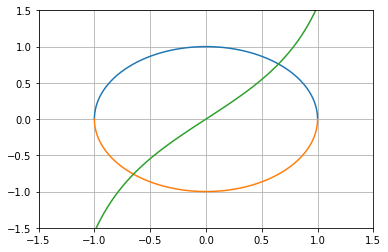

In [4]:
x_es = np.arange(-1, 1, 0.0001)
y_es_1 = np.sqrt(1 - x_es**2)
y_es_2 = -np.sqrt(1 - x_es**2)
y_es_3 = np.tan(x_es)ррррр   ррр

fig, ax = plt.subplots()
ax.plot(x_es, y_es_1, x_es, y_es_2, x_es, y_es_3)
ax.grid()
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)

plt.show()

Предложим метод Ньютона для нахождения каждого из корней:

$\left\{ \begin{gathered} x^2 + y^2 = 1 \\ y = tg(x) \\ \end{gathered} \right. \to \left\{ \begin{gathered}x^2 + y^2 = 1 \\ y - tg(x) = 0 \\ \end{gathered} \right. \to J = \left( \begin{gathered} 2x \;\;\; 2y \\ -\frac{1}{cos^2(x)} \;\;\; 1 \\ \end{gathered} \right) \to detJ = 2x + 2y\frac{1}{cos^2(x)} \to $

$detJ = 2x(1 + \frac{y}{x} \frac{1}{cos^2(x)})$

Область поиска наших решений лежит выше прямой y = x и отличен от точки х = 0 $\to$ Якобиан в области поиска отлчен от 0. Тогда, найдем обратную матрицу:

$$J^{-1} = \frac{1}{2x + 2y\frac{1}{cos^2(x)}} \left( \begin{gathered} 1 \;\;\; -2y \\ \frac{1}{cos^2(x)} \;\;\; 2x \\ \end{gathered} \right) $$

Откуда наше решение примет вид: 

$$\left( \begin{gathered} x_{n + 1} \\ y_{n + 1} \\ \end{gathered} \right) = \left( \begin{gathered} x_n \\ y_n \\ \end{gathered} \right) -  \frac{1}{2x + 2y\frac{1}{cos^2(x)}} \left( \begin{gathered} 1 \;\;\; -2y \\ \frac{1}{cos^2(x)} \;\;\; 2x \\ \end{gathered} \right) \left( \begin{gathered} x^2 + y^2 - 1 \\ y - tg(x) \\ \end{gathered} \right) $$

In [5]:
def next_x_y(x, y):
    pr_x = x
    x = x - (1/(2*x + 2*y*1/(math.cos(x)**2))) * (x**2 + y**2 - 1 - 2*y*(y - math.tan(x)))
    y = y - (1/(2*pr_x + 2*y*1/(math.cos(pr_x)**2))) * (1/(math.cos(pr_x)**2) * (pr_x**2 + y**2 - 1) + 2*pr_x*(y - math.tan(pr_x)))
    return[x, y]
    

In [7]:
y = 1/math.sqrt(2)
x = 1/math.sqrt(2)
n=0
#Поиск х, у на верхей дуге окружности
while n != 10:
    n+=1
    mass = next_x_y(x, y)
    x = mass[0]
    y = mass[1]
    
print(x, y)

0.7071067811865475 0.7071067811865475
0.7610970729135277 0.6531164894595671
0.8599976069598771 0.5423277457373396
1.0252617376479154 0.3113435779421372
1.249884203821914 -0.1905090503077871
0.783342157334417 -1.6805769670733708
-0.4955100599065263 -1.5513338033578417
-0.7923377616062932 -0.9240255447487635
-0.6708525185604539 -0.7675863389431203
-0.6502395249680639 -0.7600462542186486
-0.6498890405598629 -0.7600291823943003


Таким образом мы получили сходимость по методу Ньютона
Так как точки диаметрально противоположноые $\to$ корни будут такими же, только с противоположными знаками.

$\left( \begin{gathered} x_{1} \\ y_{1} \\ \end{gathered} \right) = \left( \begin{gathered} 0.649888 \\    0.760029 \\ \end{gathered} \right) $

$\left( \begin{gathered} x_{2} \\ y_{2} \\ \end{gathered} \right) = \left( \begin{gathered} -0.649888 \\  -0.760029 \\ \end{gathered} \right) $